# Imports

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
np.random.seed(42)

# Load Data

In [13]:
"""
/Users/ben/Desktop/DSI_GA_Materials/project_5/data - 
replace with your relative path to data file (stored in external location per git repo)
"""
df = pd.read_csv('/Users/ben/Desktop/DSI_GA_Materials/project_5/data/USAverage_Energy_CO2_1970to2021.csv')

# Inspect Data

In [14]:
df.head()

,Year,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
0,1970,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333
1,1971,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098
2,1972,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275
3,1973,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216
4,1974,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196


In [15]:
df.set_index("Year", inplace=True)

In [16]:
df.head()

,CO2_Value,Coal_Value,Natural_Gas_Value,Nuclear_Energy_Value,Petroleum_Energy_Value,Renewable_Energy_Value
Year,,,,,,
1970,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333
1971,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098
1972,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275
1973,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216
1974,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196


In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.columns = df.columns.str.replace("_value","")

In [19]:
df.columns = df.columns.str.replace("_energy","")

In [20]:
df.head()

,co2,coal,natural_gas,nuclear,petroleum,renewable
Year,,,,,,
1970,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333
1971,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098
1972,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275
1973,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216
1974,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196


In [21]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

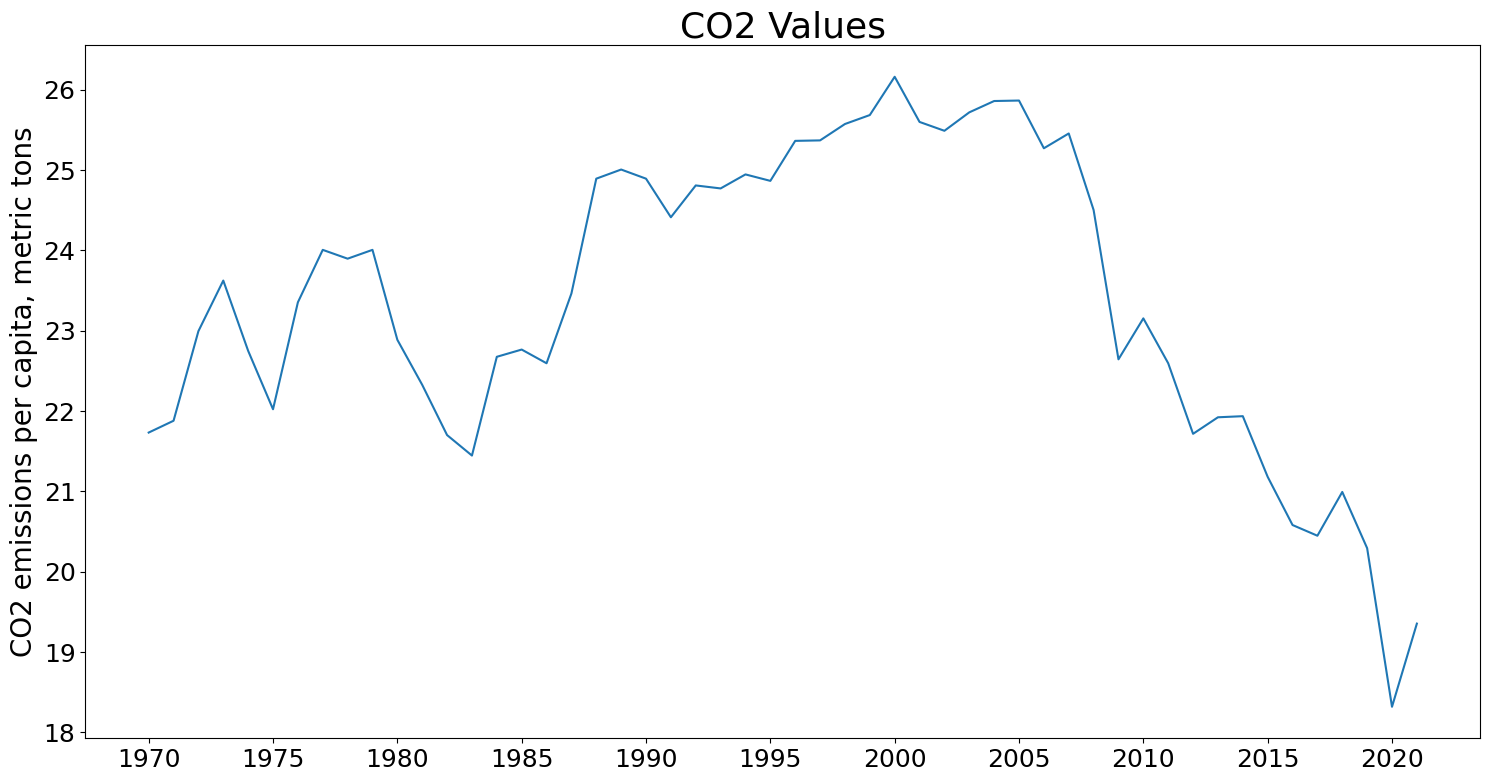

In [22]:
plot_series(df, ['co2'], title="CO2 Values", ylab="CO2 emissions per capita, metric tons",  steps=5)
plt.savefig("../Visualizations/co2_dom.png");

$\text{CO}_2$ emissions seem to dip during energy crisis in the late 1970s and early 1980s, and significant decreases since mid to late 2000s,
followed by an exceptionally large dip in $2020$, followed by the beginning of a rebound in post-COVID era.

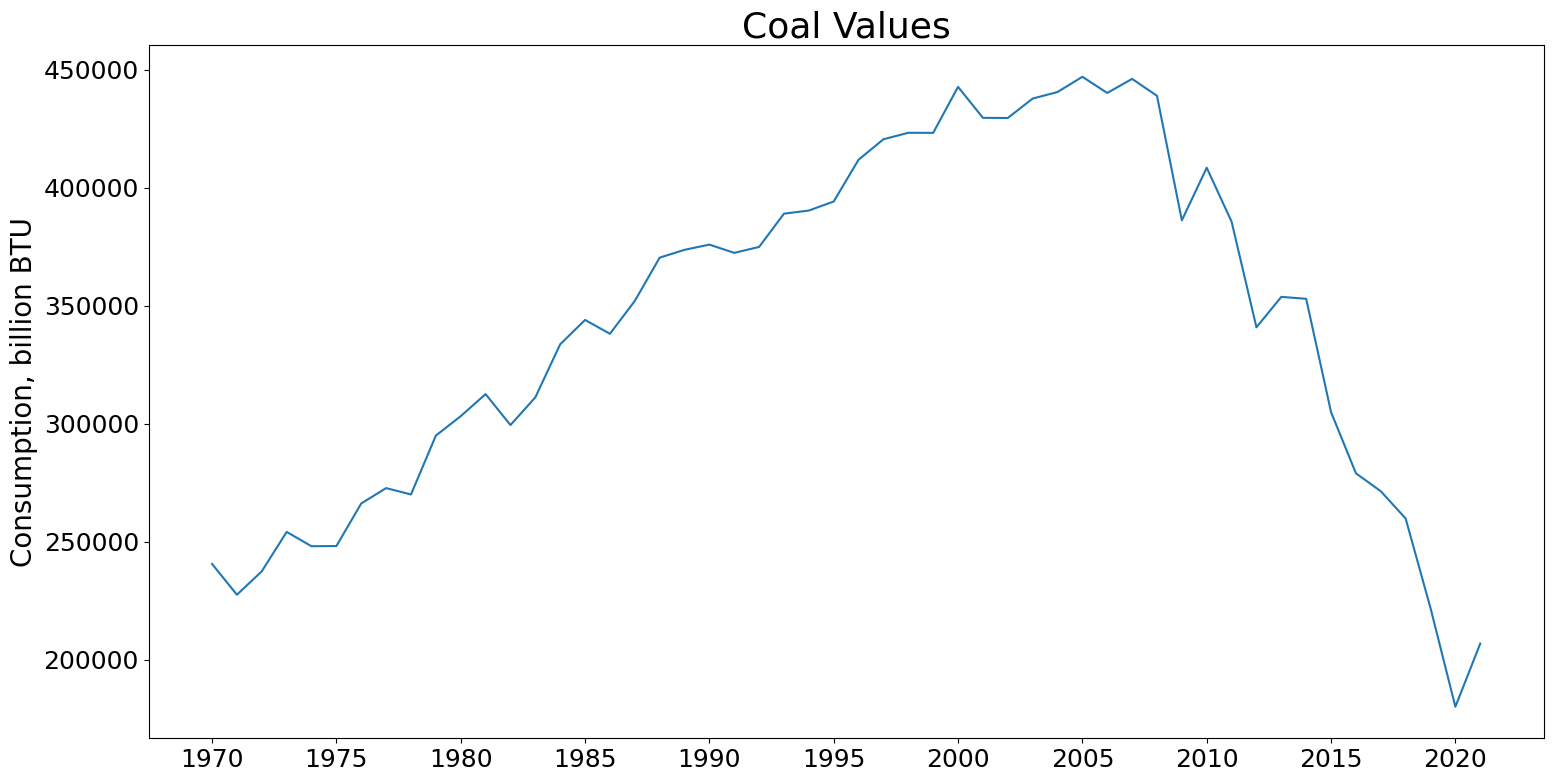

In [24]:
plot_series(df, ['coal'], title="Coal Values", ylab="Consumption, billion BTU", steps=5)
plt.savefig("../Visualizations/coal_dom.png");

Significant coal divestment from late 2000s onward

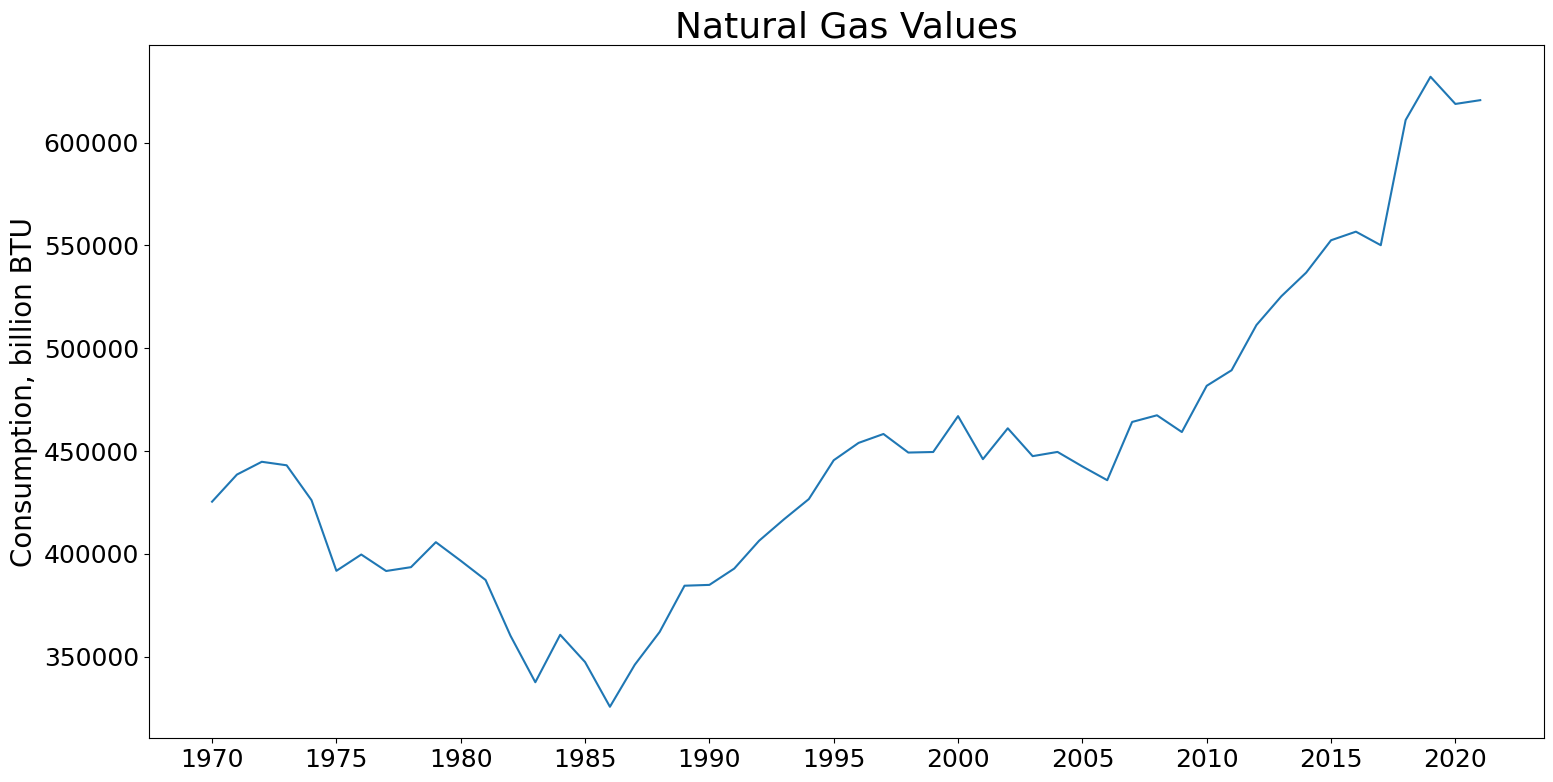

In [26]:
plot_series(df, ['natural_gas'], title="Natural Gas Values", ylab="Consumption, billion BTU", steps=5)
plt.savefig("../Visualizations/natural_gas_dom.png");

Drastic increases in energy production from natural gas began occurring in the 2000s.

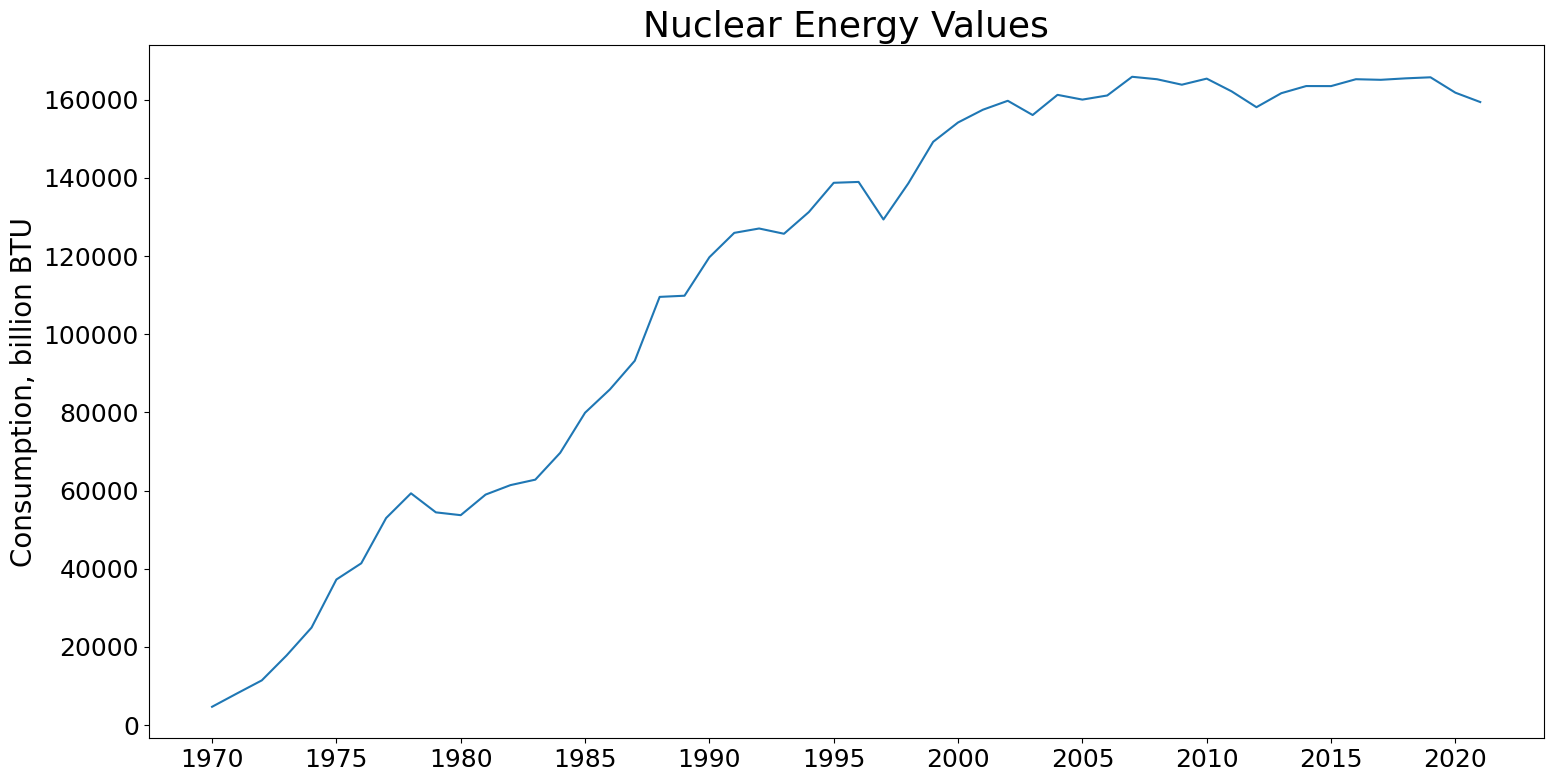

In [28]:
plot_series(df, ['nuclear'], title="Nuclear Energy Values", ylab="Consumption, billion BTU", steps=5)
plt.savefig("../Visualizations/nuclear_dom.png");

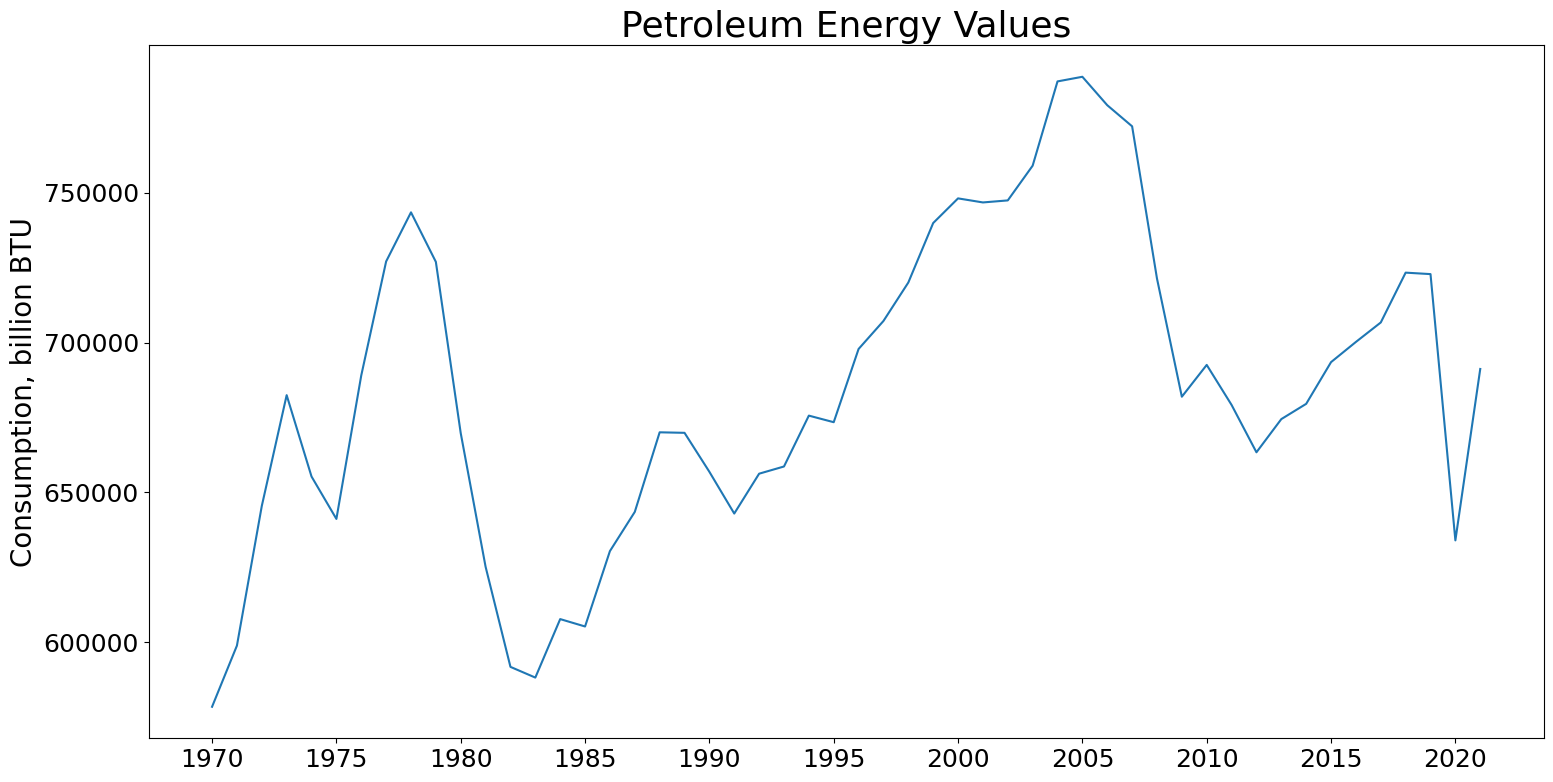

In [30]:
plot_series(df, ['petroleum'], title="Petroleum Energy Values", ylab="Consumption, billion BTU", steps=5)
plt.savefig("../Visualizations/petroleum_dom.png");

Sharp decrease in consumption of oil-produced energy in the early 1980s likely due to sharp increase in price of oil during this time period.

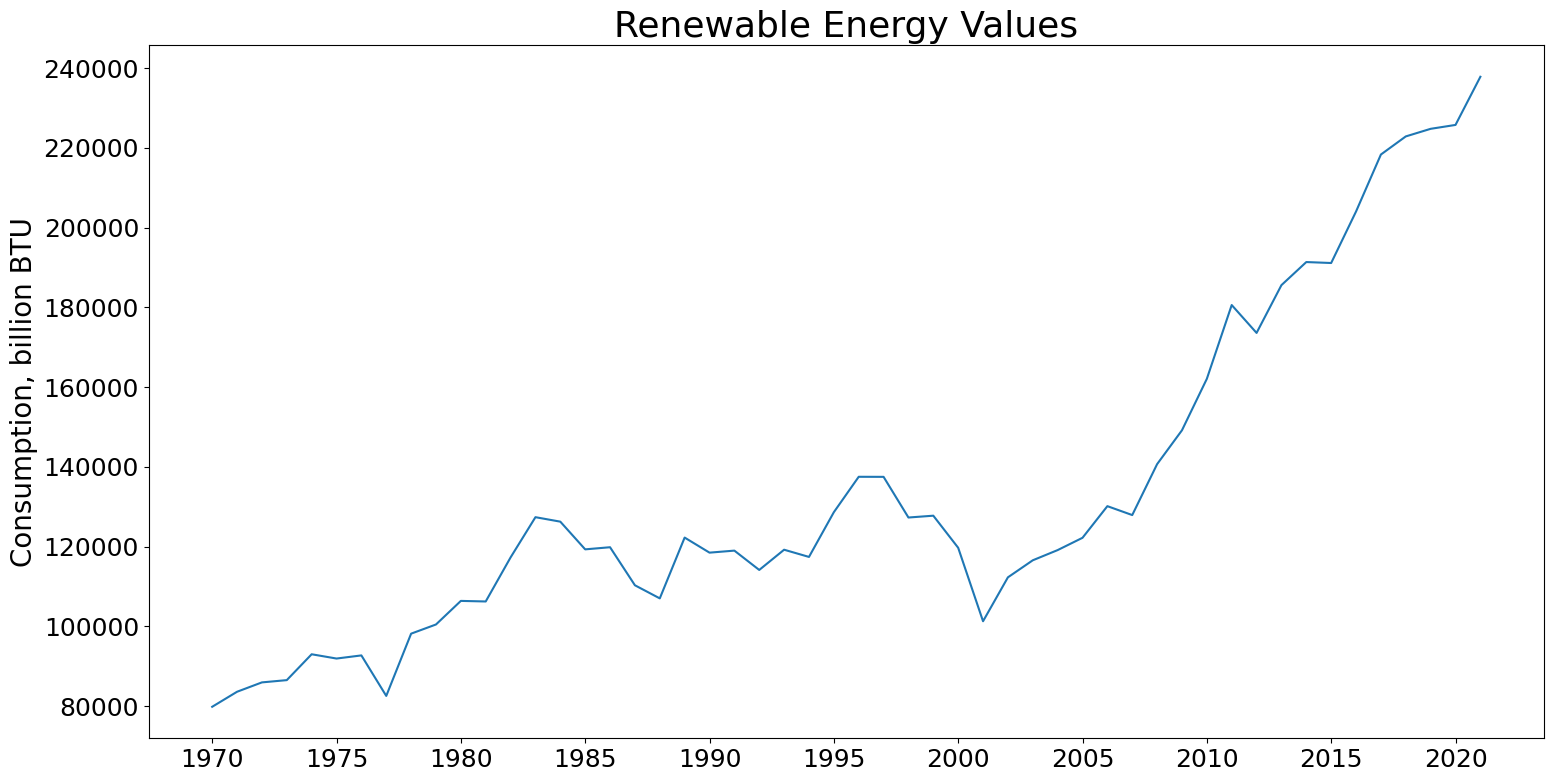

In [32]:
plot_series(df, ['renewable'], title="Renewable Energy Values", ylab="Consumption, billion BTU", steps=5)
plt.savefig("../Visualizations/renewable_dom.png");

Wind energy production began to climb drastically in the early 2000s, 2010-2020 saw continued growth in wind and more drastic growth in solar production.

In [33]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

Test for $\text{p-values}$ using an ADF test until $\text{p-value}$ is lower than $0.05$ to established stationarity. 

In [34]:
interpret_dftest(adfuller(df['co2']))

Test Statistic   -2.034696
p-value           0.271570
dtype: float64

In [35]:
interpret_dftest(adfuller(df['co2'].diff().dropna()))

Test Statistic   -3.645985
p-value           0.004940
dtype: float64

In [36]:
interpret_dftest(adfuller(df['coal']))

Test Statistic   -2.208249
p-value           0.203265
dtype: float64

In [37]:
interpret_dftest(adfuller(df['coal'].diff().dropna()))

Test Statistic    0.544552
p-value           0.986166
dtype: float64

In [38]:
interpret_dftest(adfuller(df['coal'].diff().diff().dropna()))

Test Statistic   -7.470247e+00
p-value           5.077202e-11
dtype: float64

In [39]:
interpret_dftest(adfuller(df['natural_gas']))

Test Statistic    0.945477
p-value           0.993656
dtype: float64

In [40]:
interpret_dftest(adfuller(df['natural_gas'].diff().dropna()))

Test Statistic   -6.328106e+00
p-value           2.951961e-08
dtype: float64

In [41]:
interpret_dftest(adfuller(df['nuclear']))

Test Statistic   -3.416778
p-value           0.010400
dtype: float64

Nuclear is the only feature that required no differencing in order to achieve stationarity.

In [42]:
interpret_dftest(adfuller(df['petroleum']))

Test Statistic   -2.486266
p-value           0.118852
dtype: float64

In [43]:
interpret_dftest(adfuller(df['petroleum'].diff().dropna()))

Test Statistic   -5.332416
p-value           0.000005
dtype: float64

In [44]:
interpret_dftest(adfuller(df['renewable']))

Test Statistic    1.130740
p-value           0.995471
dtype: float64

In [45]:
interpret_dftest(adfuller(df['renewable'].diff().dropna()))

Test Statistic   -6.696366e+00
p-value           3.990237e-09
dtype: float64

In [46]:
df['first_diff_co2'] = df['co2'].diff()

In [47]:
df['second_diff_coal'] = df['coal'].diff().diff()

In [48]:
df['first_diff_natural_gas'] = df['natural_gas'].diff()

In [49]:
df['first_diff_petroleum'] = df['petroleum'].diff()

In [50]:
df['first_diff_renewable'] = df['renewable'].diff()

In [51]:
df.head()

,co2,coal,natural_gas,nuclear,petroleum,renewable,first_diff_co2,second_diff_coal,first_diff_natural_gas,first_diff_petroleum,first_diff_renewable
Year,,,,,,,,,,,
1970,21.733333,240566.529412,425347.294118,4693.098039,578433.607843,79804.333333,NaN,NaN,NaN,NaN,NaN
1971,21.880392,227513.745098,438534.254902,8096.843137,598852.058824,83572.745098,0.147059,NaN,13186.960784,20418.450980,3768.411765
1972,22.996078,237441.764706,444754.823529,11446.098039,645473.647059,85921.686275,1.115686,22980.803922,6220.568627,46621.588235,2348.941176
1973,23.625490,254119.980392,443045.960784,17846.627451,682471.156863,86489.039216,0.629412,6750.196078,-1708.862745,36997.509804,567.352941
1974,22.750980,248058.960784,426069.764706,24942.843137,655306.156863,92977.490196,-0.874510,-22739.235294,-16976.196078,-27165.000000,6488.450980


In [52]:
df = df[['first_diff_co2','second_diff_coal','first_diff_natural_gas','nuclear','first_diff_petroleum','first_diff_renewable']]

df.dropna(inplace=True)

Created a subset of the original dataset which consists of all of the variables being tested in the multivariate time series model after achieving stationarity.

In [53]:
train, test = train_test_split(df, test_size = 0.2, shuffle=False)

In [54]:
model = VAR(train)

/Users/ben/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
ts_model = model.fit(maxlags=4,
                     ic = 'aic')

In [56]:
ts_model.k_ar

4

In [57]:
ts_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 16, Mar, 2024
Time:                     14:57:00
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    93.5335
Nobs:                     36.0000    HQIC:                   89.2384
Log likelihood:          -1721.33    FPE:                3.98209e+38
AIC:                      86.9355    Det(Omega_mle):     1.68247e+37
--------------------------------------------------------------------
Results for equation first_diff_co2
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                             0.254084         0.764781            0.332           0.740
L1.first_diff_co2                -0.674921         1.008984           -0.669           0.504
L1.

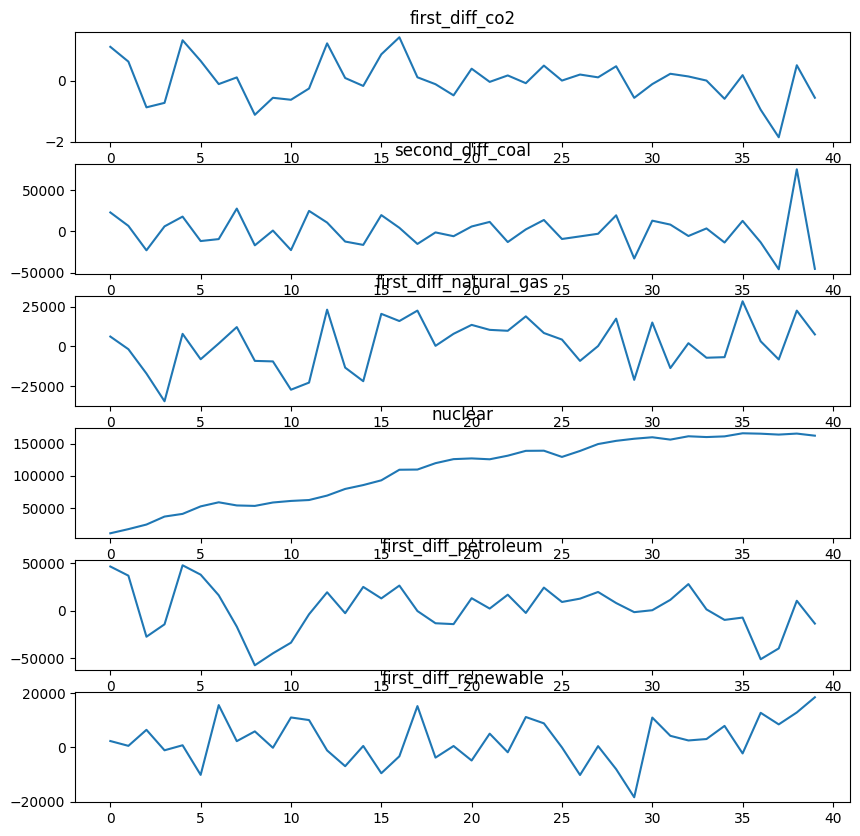

In [58]:
ts_model.plot();

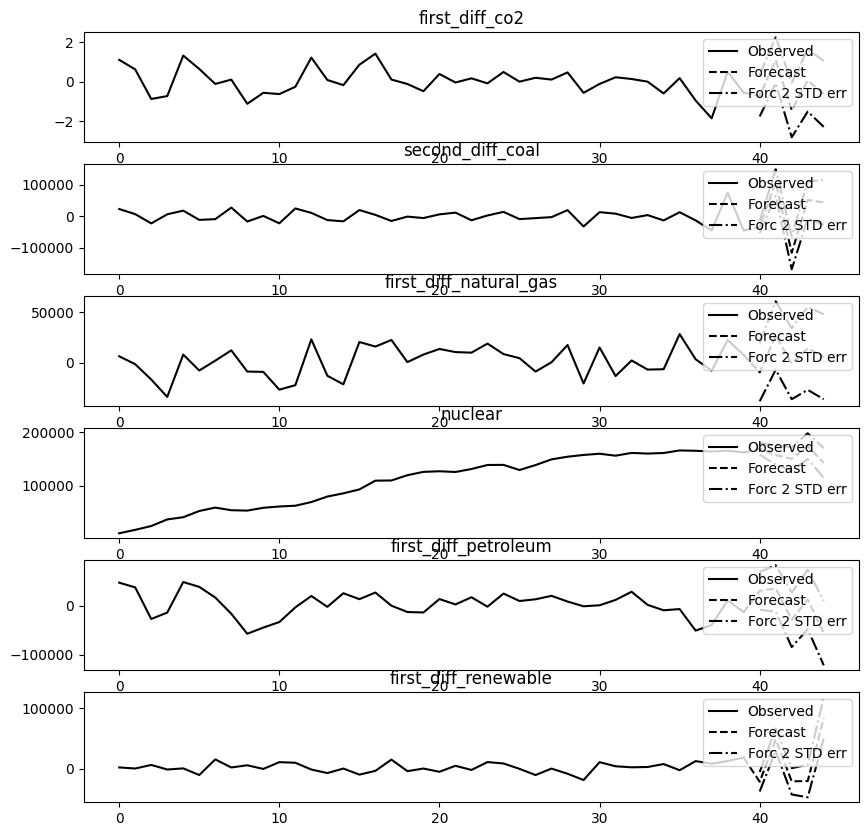

In [60]:
ts_model.plot_forecast(5)
plt.savefig("../Visualizations/multivariateplot.png");

$\text{CO}_2$ emissions forecasted to increase slightly in post-COVID era, followed by continued downward trend.

In [61]:
forecast = ts_model.forecast(train.values, len(test))

In [62]:
for i in range(test.shape[1]):
    print(f"The test RMSE on the {test.columns[i]} data is: \
          {(mean_squared_error(test.values[:,i], forecast[:, i]))**.5}")

The test RMSE on the first_diff_co2 data is:           1.7407877620433105
The test RMSE on the second_diff_coal data is:           157777.97995979726
The test RMSE on the first_diff_natural_gas data is:           34779.94821255505
The test RMSE on the nuclear data is:           17989.922875218082
The test RMSE on the first_diff_petroleum data is:           63008.63853392235
The test RMSE on the first_diff_renewable data is:           83886.77771507428
